<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-mukalamusij/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: JOYCE MUKALAMUSI

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

The initial design plan for the TSP algorithm ws to create a fairly simple implementation of the greedy algorithm for solving the TSP (Traveling Salesman Problem). As I was progressing through this it was clear that error handling was necessary to make the code effecient.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I did not work with anyone from the class on this lab, I wish I did but I did receive help from a family friend of mine, she just graduated from Kentucky State with her bachelors in CS. I also did receive help from Chat GPT as well as articles that delve more into 2 opt and greedy algorithms. GeeksForGeeks was also a big help on this!!!

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

By far the hardest thing I had to do was synthesize the code and actually figure out how I wanted to structure it. I was struggling to work with the given format Dr. Jan provided for us, so I completely re-wrote the algorithm. I tried to parse the coordinates points but I was just having difficulty doing that, so I ended up scratching everything and in order for me to retrieve the nodes I had to manually input the edges and nodes myself.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I calculated the distances between the nodes from the other ones by implementing the distance formula. I also threw away the provided URL link.

**TESTING**: Describe how you tested this work.

I utimately added some test cases within the code.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

All in all I am so happy my code doesn't have any error messages, although the only thing I would consider as an "error" is that I wasn't able to pull the vertices and nodes from the provided URL, so I manually did it.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

This lab was sort of difficult but it taught me a lot. It taught me that with all kinds of methods you can figure out a common solution because like I mentioned previously, I had to scratch the code given and basically start with my own algorithm and I still managed to get a working algorithm and achieve all the deliverables. One thing I do wish we got beforehand was some guidance on the lab. I wish we kind of went over it in class, instead of tackling it blind. I did appreciate the extended deadline as well, even though I did start it late I was able to finish it just on time.

## Import Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [ ]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

TSP Route: [0, 3, 1, 4, 5, 2, 0]


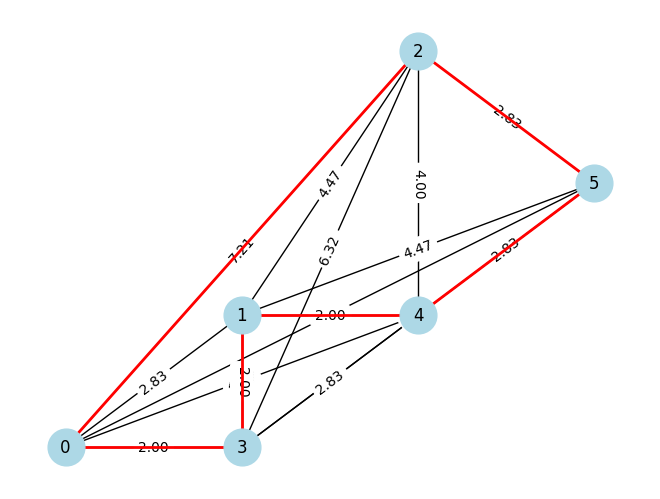

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import math

class TSPGreedy:
    """
    A class that implements the Greedy algorithm for solving the Traveling Salesman Problem (TSP).
    """

    def __init__(self):
        """
        Initialize the TSPGreedy class with an empty graph.

        Returns:
            None
        """
        self.graph = nx.Graph()
        self.route = []

    def add_vertex(self, x, y):
        """
        Adds a vertex to the graph with the specified coordinates.

        Arguments:
            x {float} -- The x-coordinate of the vertex.
            y {float} -- The y-coordinate of the vertex.

        Returns:
            int -- The index of the added vertex.

        Raises:
            ValueError -- If the vertex already exists in the graph.
        """
        if (x, y) in [self.graph.nodes[node]['pos'] for node in self.graph.nodes]:
            raise ValueError("Vertex already exists in the graph")
        self.graph.add_node(len(self.graph.nodes), pos=(x, y))
        return len(self.graph.nodes) - 1

    def add_edge(self, node1, node2):
        """
        Adds an edge between two nodes with a calculated weight (distance).

        Arguments:
            node1 {int} -- The first node.
            node2 {int} -- The second node.

        Returns:
            float -- The weight of the added edge.

        Raises:
            ValueError -- If one or both nodes do not exist in the graph, or if the edge already exists.
        """
        if node1 not in self.graph.nodes or node2 not in self.graph.nodes:
            raise ValueError("One or both nodes do not exist in the graph")
        if self.graph.has_edge(node1, node2):
            raise ValueError("Edge already exists in the graph")
        pos1 = self.graph.nodes[node1]['pos']
        pos2 = self.graph.nodes[node2]['pos']
        #weight = math.sqrt((pos1[0] - pos2[0])**1 + (pos1[1] - pos2[1])**2)
        weight = math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)
        self.graph.add_edge(node1, node2, weight=weight)
        return weight

    def greedy_tsp(self, start_node):
        """
        Greedy TSP algorithm that finds a route starting from the given start_node.

        Arguments:
            start_node {int} -- The starting node.

        Returns:
            route {list} -- List of nodes representing the route.

        Raises:
            ValueError -- If the start node is not in the graph.
        """
        if start_node not in self.graph.nodes:
            raise ValueError("Start node is not in the graph")
        # iitialize visited nodes and start with the start_node
        visited = set()
        current_node = start_node
        self.route.append(current_node)
        visited.add(current_node)

        # continue visiting nodes until all nodes are visited
        while len(visited) < len(self.graph.nodes):
            # find the nearest unvisited neighbor
            neighbors = [(neighbor, self.graph.edges[current_node, neighbor]['weight'])
                         for neighbor in self.graph.neighbors(current_node)
                         if neighbor not in visited]

            # select the nearest unvisited neighbor
            next_node = min(neighbors, key=lambda x: x[1])[0]
            self.route.append(next_node)
            visited.add(next_node)
            current_node = next_node

        # return to the start to complete the cycle
        self.route.append(start_node)
        return self.route

    def plot_graph(self):
        """
        Plots the graph and the TSP route using NetworkX and matplotlib.
        """
        # node positions
        pos = nx.get_node_attributes(self.graph, 'pos')

        # draw the graph
        nx.draw(self.graph, pos, with_labels=True, node_size=700, node_color='lightblue')

        # draw the edges with weights
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        labels = {(u, v): f"{edge_labels[(u, v)]:.2f}" for u, v in edge_labels}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels)


        edge_list = [(self.route[i], self.route[i+1]) for i in range(len(self.route) - 1)]
        nx.draw_networkx_edges(self.graph, pos, edgelist=edge_list, edge_color='r', width=2)


        plt.show()

def main():
    """
    Main function to run the TSPGreedy algorithm.

    Returns:
        None
    """
    # create TSPGreedy object
    tsp = TSPGreedy()

    # add vertices (coordinates)
    tsp.add_vertex(1, 5)
    tsp.add_vertex(3, 7)
    tsp.add_vertex(5, 11)
    tsp.add_vertex(3, 5)
    tsp.add_vertex(5, 7)
    tsp.add_vertex(7, 9)

    # edges between all pairs of vertices
    for i in range(len(tsp.graph.nodes)):
        for j in range(i+1, len(tsp.graph.nodes)):
            tsp.add_edge(i, j)

    # ryn the greedy TSP algorithm starting from node 0
    route = tsp.greedy_tsp(start_node=0)
    print("TSP Route:", route)

    # plot the graph with the TSP route
    tsp.plot_graph()

if __name__ == "__main__":
    main()